In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the data
NYCSR=pd.read_csv(r"C:\Users\ADMIN\Desktop\Data Scientist\Data Science with python\Projects\PR1_311_Service_Requests_from_2010_to_Present.csv",low_memory=True)
NYCSR.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


## Descriptive Analysis

In [3]:
NYCSR.shape

(364558, 53)

In [4]:
NYCSR.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [5]:
type(NYCSR)

pandas.core.frame.DataFrame

In [6]:
NYCSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [7]:
NYCSR.isnull().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [8]:
NYCSR.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [9]:
NYCSR.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

### We have lots of missing values which does not provide clear insights about the data. Hence moving on with EDA

In [10]:
#Droping all null columns 
NYC=NYCSR.drop(["School or Citywide Complaint","Vehicle Type","Taxi Company Borough","Taxi Pick Up Location","Garage Lot Name"],axis=1)
NYC.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [11]:
# Removing the columns with maximum missing values
NYC.loc[:,(NYC.isnull().sum()/NYC.shape[0]*100)<50].head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [12]:
NYC.describe().T

,count,mean,std,min,25%,50%,75%,max
Unique Key,364558.0,3.106595e+07,733153.094662,2.960737e+07,3.049938e+07,3.108795e+07,3.167433e+07,3.231065e+07
Incident Zip,361560.0,1.085850e+04,578.263114,8.300000e+01,1.031400e+04,1.120900e+04,1.123800e+04,1.169700e+04
X Coordinate (State Plane),360528.0,1.005043e+06,21963.624050,9.133570e+05,9.919460e+05,1.003470e+06,1.019134e+06,1.067186e+06
Y Coordinate (State Plane),360528.0,2.034253e+05,29842.192857,1.211850e+05,1.829450e+05,2.010230e+05,2.227900e+05,2.718760e+05
Latitude,360528.0,4.072498e+01,0.081907,4.049904e+01,4.066874e+01,4.071841e+01,4.077817e+01,4.091287e+01
Longitude,360528.0,-7.392495e+01,0.079213,-7.425494e+01,-7.397225e+01,-7.393064e+01,-7.387410e+01,-7.370072e+01


In [13]:
#To cross check for any null value
NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [14]:
NYC.loc[:,['Created Date','Closed Date']]

,Created Date,Closed Date
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM
...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM


#### Analyze the date column and remove the entries if it has an incorrect timeline

In [15]:
#Change Date columns to YYYY-MM-DD
NYC["Created Date"]=pd.to_datetime(NYC['Created Date'])
NYC["Closed Date"]=pd.to_datetime(NYC['Closed Date'])

In [16]:
#To check whether the date are in correct order
NYC.loc[NYC['Created Date']>=NYC['Closed Date']].shape

(0, 48)

In [17]:
# Drop the rows where Closed Dates and Created Dates are empty
NYC=NYC[NYC['Closed Date'].notnull()]
NYC=NYC[NYC['Created Date'].notnull()]

# Feature Creation

In [18]:
# Addition of Features 
NYC['Average_Response_Time']= NYC['Closed Date'].values-NYC['Created Date'].values

In [19]:
NYC['Average_Response_Time_min'] = NYC['Average_Response_Time']/np.timedelta64(1,'m')
NYC.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Average_Response_Time,Average_Response_Time_min
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,55.500000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,87.216667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34,291.566667


# Exploratory Data Analysis

<AxesSubplot:xlabel='Average_Response_Time', ylabel='Density'>

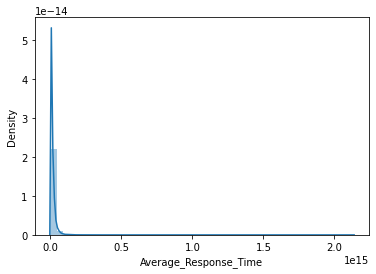

In [20]:
sns.distplot(NYC["Average_Response_Time"])

### Clearly the Average response time is rightly skewed

In [21]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      362177 non-null  int64          
 1   Created Date                    362177 non-null  datetime64[ns] 
 2   Closed Date                     362177 non-null  datetime64[ns] 
 3   Agency                          362177 non-null  object         
 4   Agency Name                     362177 non-null  object         
 5   Complaint Type                  362177 non-null  object         
 6   Descriptor                      355681 non-null  object         
 7   Location Type                   362047 non-null  object         
 8   Incident Zip                    361502 non-null  float64        
 9   Incident Address                310491 non-null  object         
 10  Street Name                     310491 non-n

In [22]:
# City wise Complaints
NYC.loc[:,['Complaint Type','City']]

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
364553,Illegal Parking,WOODHAVEN
364554,Noise - Vehicle,BRONX
364555,Noise - Street/Sidewalk,NEW YORK
364556,Blocked Driveway,BRONX


In [23]:
NYC1=NYC.groupby(['City','Complaint Type']).size().unstack().fillna(0)

Text(0.5, 1.0, 'City-wise Complaints')

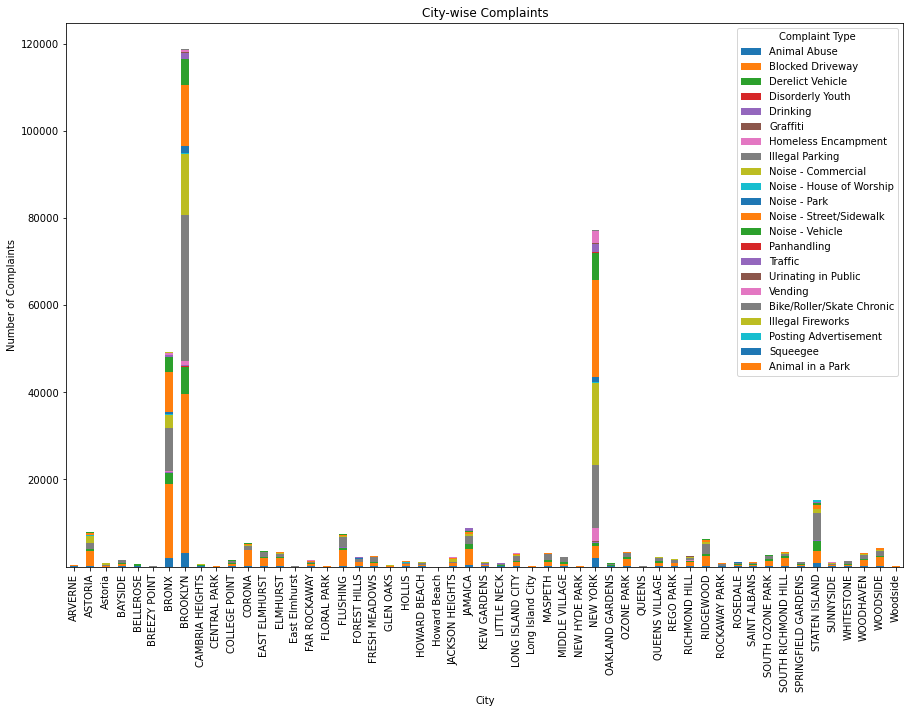

In [24]:
NYC1.plot.bar(figsize=(15,10), stacked=True)
plt.ylabel('Number of Complaints')
plt.title('City-wise Complaints')

In [25]:
NYC['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [26]:
# Changing all city names to title format to count it as numbers
def title(city):
    try:
        city=city.title()
        return city
    except:
        return np.nan
    
NYC['City']=NYC['City'].apply(title)
NYC['City'].value_counts()

Brooklyn               118849
New York                77289
Bronx                   49166
Staten Island           15335
Jamaica                  8930
Astoria                  8896
Flushing                 7486
Ridgewood                6391
Corona                   5383
Woodside                 4523
East Elmhurst            3587
Ozone Park               3446
Elmhurst                 3438
South Richmond Hill      3431
Long Island City         3197
Maspeth                  3117
Woodhaven                3102
South Ozone Park         2668
Fresh Meadows            2453
Richmond Hill            2333
Middle Village           2291
Queens Village           2251
Forest Hills             2122
Jackson Heights          2105
Rego Park                1807
Bayside                  1550
College Point            1544
Far Rockaway             1397
Whitestone               1369
Hollis                   1231
Howard Beach             1145
Springfield Gardens      1094
Rosedale                 1091
Saint Alba

In [27]:
NYC['Complaint Type'].value_counts()

Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Complaint Frequency in Brooklyn'}>

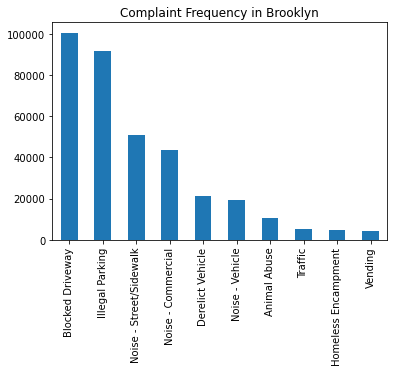

In [28]:
NYCBKN=NYC.loc[NYC['City']=='Brooklyn']
NYC['Complaint Type'].value_counts().head(10).plot(kind='bar',title='Complaint Frequency in Brooklyn')

### Major Complaints belongs to transport like Blocked Driveway, Illegal Parking, Noise-Street/Vehicle,Traffic

<AxesSubplot:title={'center':'Complaint Concentration acroos Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

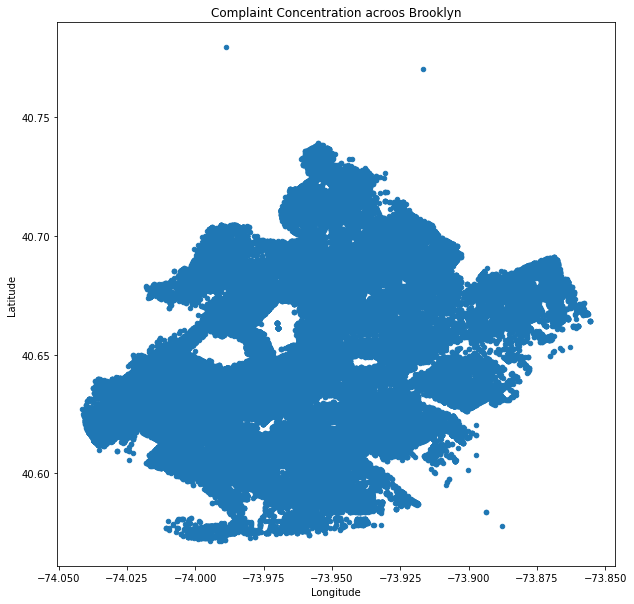

In [29]:
# Scatter plot for complaint concentration
NYCBKN[['Longitude','Latitude']].plot(kind='scatter',x='Longitude',y='Latitude', title='Complaint Concentration acroos Brooklyn',figsize=(10,10))

<AxesSubplot:title={'center':'Complaint Concentration acroos Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

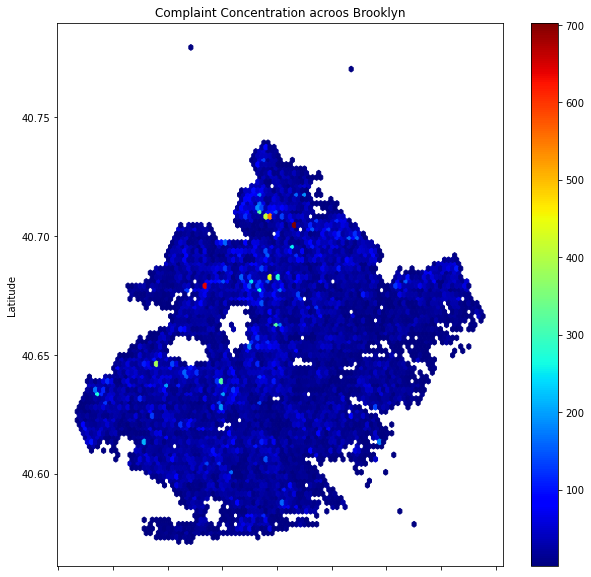

In [30]:
#Hexbin plot for complaint concentration
NYCBKN[['Longitude','Latitude']].plot(kind='hexbin', x='Longitude',y='Latitude', colormap='jet', mincnt=1, title='Complaint Concentration acroos Brooklyn',figsize=(10,10))

In [31]:
NYC.groupby(['City','Complaint Type']).size()

City      Complaint Type         
Arverne   Animal Abuse                46
          Blocked Driveway            50
          Derelict Vehicle            32
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Noise - Street/Sidewalk    266
          Noise - Vehicle            136
          Traffic                     45
          Urinating in Public          8
          Vending                     15
Length: 759, dtype: int64

In [32]:
# Major Complaint types
MCNYC=NYC.loc[:,"Complaint Type"]
MCNYC

0         Noise - Street/Sidewalk
1                Blocked Driveway
2                Blocked Driveway
3                 Illegal Parking
4                 Illegal Parking
                   ...           
364553            Illegal Parking
364554            Noise - Vehicle
364555    Noise - Street/Sidewalk
364556           Blocked Driveway
364557           Blocked Driveway
Name: Complaint Type, Length: 362177, dtype: object

In [33]:
MCNYC.unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [34]:
MCNYC.nunique()

23

In [35]:
# Top Complaint types
TMCNYC=MCNYC.value_counts()
TMCNYC

Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [36]:
# Top 10 major Complaints
TMCNYC.head(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Count vs Complaint Types'}>

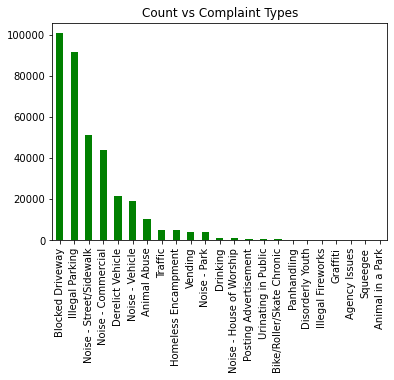

In [37]:
# Bar Grapgh of Count vs Complaint Type
MCNYC.value_counts().plot(kind='bar',title='Count vs Complaint Types',color='g')

<AxesSubplot:title={'center':'Counts of Major Complaints'}>

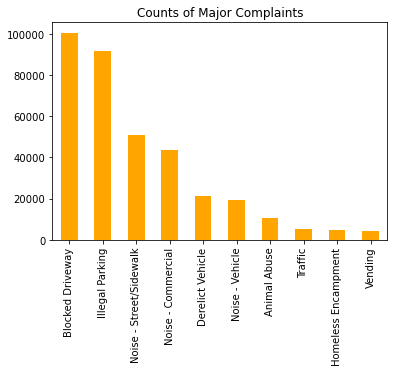

In [38]:
# Bar graph of count vs top 10 major complaints
TMCNYC.head(10).plot(kind='bar',title='Counts of Major Complaints',color='orange')

In [39]:
# City wise Complaints
NYC.loc[:,['Complaint Type','City']]

,Complaint Type,City
0,Noise - Street/Sidewalk,New York
1,Blocked Driveway,Astoria
2,Blocked Driveway,Bronx
3,Illegal Parking,Bronx
4,Illegal Parking,Elmhurst
...,...,...
364553,Illegal Parking,Woodhaven
364554,Noise - Vehicle,Bronx
364555,Noise - Street/Sidewalk,New York
364556,Blocked Driveway,Bronx


Text(0.5, 1.0, 'City-wise Major-Complaints')

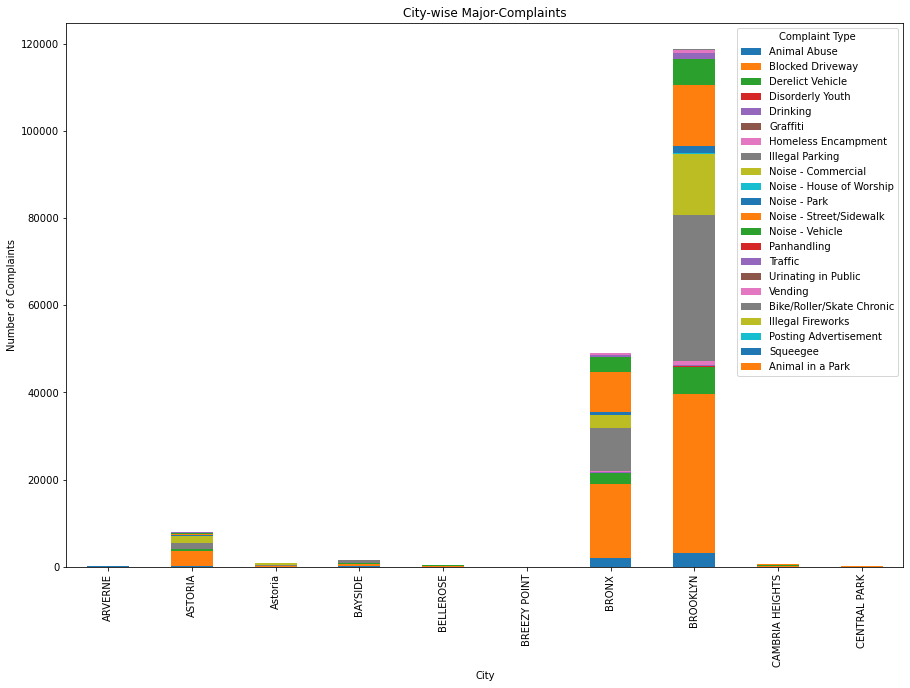

In [41]:
# Display the major type of complaints in each city
NYC1.head(10).plot.bar(figsize=(15,10), stacked=True)
plt.ylabel('Number of Complaints')
plt.title('City-wise Major-Complaints')

In [42]:
NYC2=NYC[['Complaint Type', 'Average_Response_Time_min']]
NYC2

,Complaint Type,Average_Response_Time_min
0,Noise - Street/Sidewalk,55.500000
1,Blocked Driveway,87.216667
2,Blocked Driveway,291.566667
3,Illegal Parking,465.450000
4,Illegal Parking,207.733333
...,...,...
364553,Illegal Parking,617.783333
364554,Noise - Vehicle,140.566667
364555,Noise - Street/Sidewalk,19.050000
364556,Blocked Driveway,160.883333


In [43]:
# Check the average response time across various type of complaints
NYC3=NYC2.groupby('Complaint Type')['Average_Response_Time_min'].mean().fillna(0).to_frame()
NYC3.sort_values("Average_Response_Time_min")

,Average_Response_Time_min
Complaint Type,
Posting Advertisement,121.437604
Illegal Fireworks,168.558043
Noise - Commercial,184.762676
Noise - House of Worship,189.851451
Noise - Park,203.767592
Noise - Street/Sidewalk,203.854924
Traffic,205.152002
Disorderly Youth,206.062487
Noise - Vehicle,209.363334


## Hypothesis Testing

In [44]:
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
# CHI squareTest 
# Null Hypothesis(H0): The average response time across complaint types is not different
# Alternate Hypothesis(H1): The average response time across complaint types is different

In [46]:
chi_sq=pd.DataFrame()
chi_sq["Average_Response_Time_min"]=NYC["Average_Response_Time_min"]
chi_sq["Complaint Type"]=NYC["Complaint Type"]
chi_sq.dropna(inplace=True)

In [47]:
data_crosstab=pd.crosstab(chi_sq["Average_Response_Time_min"],["Complaint Type"])

In [48]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
alpha=0.05
if p<=alpha:
    print('No Difference(Accept H0)')
else:
    print('Significant Difference(Reject H0)')
        

Significant Difference(Reject H0)


# Since p value is less than 0.05, hence we conclude that there is significant difference of Response time with every different complaint

# Conclusion
					
•	Maximum Number of Complaint belong to Transport sectors
•	Maximum number of Complaints belong to Brooklyn city.
•	Time taken to solve the different complaints are completely different
